In [20]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import matplotlib.cm as cm
from scipy.signal import savgol_filter
from scipy import stats

batch1 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

numBat1 = len(batch1.keys())

batch2 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch2.pkl','rb'))
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

numBat2 = len(batch2.keys())

batch3 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

numBat3 = len(batch3.keys())
numBat = numBat1 + numBat2 + numBat3
bat_dict = {**batch1, **batch2, **batch3}

In [21]:
X=[]
Y=[]

for i,j in enumerate(bat_dict.keys()):
    if j=='b2c1':
        continue
    if j=='b3c16':
        continue
    if j=='b3c17':
        continue
    if j=='b3c42':
        continue
    if j=='b3c43':
        continue
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=diff=Qdlin100-Qdlin10
    var,cycle=np.var(diff),bat_dict[j]['cycle_life'].tolist()
    X.append(var)
    Y.append(cycle[0][0])

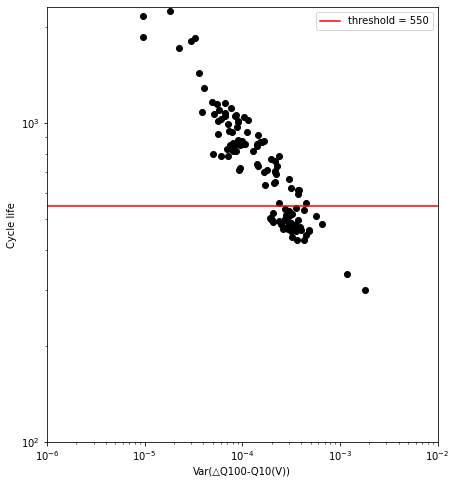

In [22]:
threshold = 550
def showthreshold(y):
    X=[10**(-6),10**(-2)]
    Y=[y,y]
    return X,Y
threshold_X, threshold_Y = showthreshold(threshold)
plt.figure(figsize=(7,8))
plt.scatter(X,Y,color='black')
plt.plot(threshold_X, threshold_Y,c='red',label='threshold = 550')
plt.xscale('log')
plt.yscale('log')
plt.axis([10**(-6),10**(-2),100,2300])
plt.xlabel('Var(△Q100-Q10(V))')
plt.ylabel('Cycle life')
plt.legend()

Binary data로 변환

In [23]:
Y_class=[]
for i in Y:
    if i>=threshold:
        Y_class.append(1)
    else:
        Y_class.append(0)
print(Y_class)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [24]:
print(Y)

[1852.0, 2160.0, 2237.0, 1434.0, 1709.0, 1074.0, 636.0, 870.0, 1054.0, 788.0, 880.0, 719.0, 862.0, 857.0, 691.0, 788.0, 534.0, 559.0, 1014.0, 1017.0, 854.0, 870.0, 842.0, 860.0, 917.0, 709.0, 876.0, 731.0, 757.0, 742.0, 703.0, 704.0, 648.0, 617.0, 625.0, 966.0, 1051.0, 702.0, 651.0, 616.0, 599.0, 300.0, 438.0, 335.0, 444.0, 480.0, 511.0, 561.0, 477.0, 458.0, 483.0, 485.0, 494.0, 487.0, 461.0, 502.0, 489.0, 513.0, 527.0, 495.0, 461.0, 471.0, 468.0, 509.0, 498.0, 481.0, 492.0, 519.0, 520.0, 499.0, 463.0, 535.0, 478.0, 465.0, 459.0, 499.0, 429.0, 466.0, 462.0, 457.0, 487.0, 429.0, 713.0, 1009.0, 1063.0, 1115.0, 1048.0, 828.0, 667.0, 1836.0, 828.0, 1039.0, 1078.0, 817.0, 932.0, 816.0, 858.0, 876.0, 1146.0, 1155.0, 813.0, 772.0, 1002.0, 825.0, 989.0, 1028.0, 850.0, 541.0, 858.0, 935.0, 731.0, 1284.0, 1158.0, 1093.0, 923.0, 796.0, 786.0, 940.0, 1801.0]


In [34]:
print(X)

[[9.66360026e-06]
 [9.68367896e-06]
 [1.83231551e-05]
 [3.60899799e-05]
 [2.25038249e-05]
 [6.62402613e-05]
 [1.70263713e-04]
 [1.53643405e-04]
 [8.72200482e-05]
 [7.13022886e-05]
 [8.99352943e-05]
 [9.59513074e-05]
 [7.95401351e-05]
 [1.07112597e-04]
 [2.23830598e-04]
 [2.39934761e-04]
 [4.29301682e-04]
 [4.46336032e-04]
 [9.10345724e-05]
 [1.15169499e-04]
 [9.37802054e-05]
 [1.60243345e-04]
 [1.40054414e-04]
 [1.42984247e-04]
 [1.45117001e-04]
 [1.80011720e-04]
 [1.66827398e-04]
 [2.25702569e-04]
 [2.15249624e-04]
 [1.41704566e-04]
 [1.68808451e-04]
 [2.14041831e-04]
 [2.11865922e-04]
 [3.68936672e-04]
 [3.12943748e-04]
 [8.80617466e-05]
 [8.48176100e-05]
 [2.15846104e-04]
 [2.14892337e-04]
 [3.79577093e-04]
 [3.75584589e-04]
 [1.79591947e-03]
 [3.21174621e-04]
 [1.17612592e-03]
 [4.44626099e-04]
 [2.49634716e-04]
 [5.69653085e-04]
 [2.36421300e-04]
 [3.44573529e-04]
 [4.78509041e-04]
 [6.53404308e-04]
 [3.17137935e-04]
 [3.72398911e-04]
 [2.96718995e-04]
 [4.83053375e-04]
 [1.901356

Text(0.5, 0, 'Var(△Q100-Q10(V))')

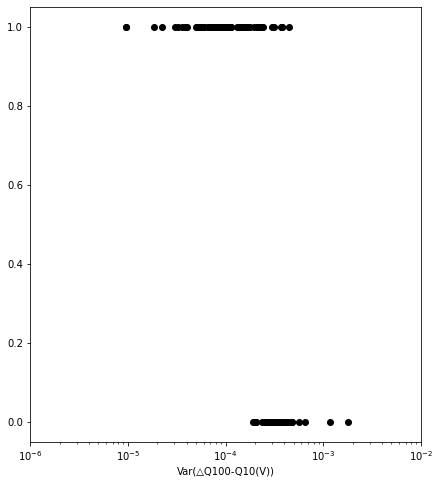

In [26]:
plt.figure(figsize=(7,8))
plt.scatter(X,Y_class,color='black')
plt.xscale('log')
plt.xlim([10**(-6),10**(-2)])
plt.xlabel('Var(△Q100-Q10(V))')

# 선형 회귀 연습
#

0.01: [[ 0.59403996]
 [-0.99953895]]
0.01: [[ 1.00293311]
 [-0.6311578 ]]
0.01: [[ 1.36640246]
 [-0.59029487]]
0.01: [[ 1.66348729]
 [-0.55689521]]
0.01: [[ 1.90631213]
 [-0.52959571]]
0.01: [[ 2.10478712]
 [-0.50728222]]
0.01: [[ 2.26701236]
 [-0.4890441 ]]
0.01: [[ 2.39960857]
 [-0.47413702]]
0.01: [[ 2.50798723]
 [-0.46195259]]
0.01: [[ 2.59657146]
 [-0.45199353]]
0.01: [[ 2.66897654]
 [-0.44385341]]
0.05: [[  2.58201617]
 [-15.66342701]]
0.05: [[nan]
 [nan]]
0.05: [[nan]
 [nan]]
0.05: [[nan]
 [nan]]
0.05: [[nan]
 [nan]]
0.05: [[nan]
 [nan]]
0.05: [[nan]
 [nan]]
0.05: [[nan]
 [nan]]
0.05: [[nan]
 [nan]]
0.05: [[nan]
 [nan]]
0.05: [[nan]
 [nan]]
0.001: [[-0.22464741]
 [-0.3181157 ]]


C:\Users\JanggoonKim\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in subtract


0.001: [[-0.11133367]
 [-0.75642887]]
0.001: [[-0.04935888]
 [-0.74946137]]
0.001: [[ 0.01137865]
 [-0.74263298]]
0.001: [[ 0.07090361]
 [-0.7359409 ]]
0.001: [[ 0.12924023]
 [-0.72938243]]
0.001: [[ 0.18641221]
 [-0.72295489]]
0.001: [[ 0.24244282]
 [-0.71665566]]
0.001: [[ 0.29735484]
 [-0.7104822 ]]
0.001: [[ 0.3511706 ]
 [-0.70443198]]
0.001: [[ 0.40391199]
 [-0.69850255]]


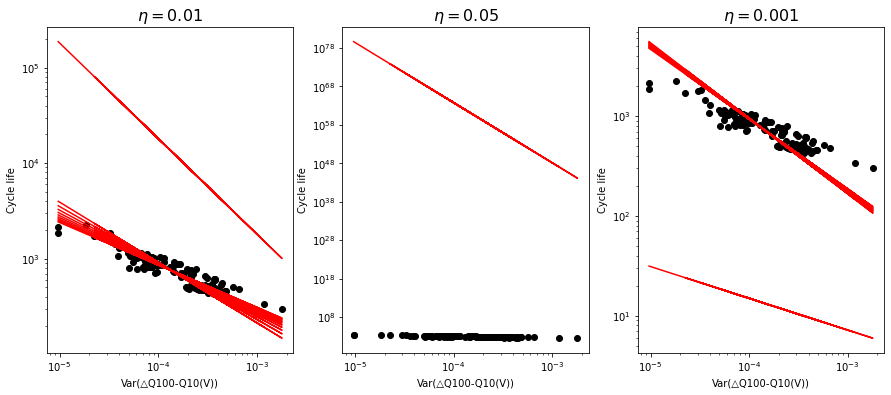

In [197]:
plt.figure(figsize=(15,6))
np.random.seed(42)
X= np.array(X).reshape(-1,1)
m= len(X)
X_b = np.c_[np.ones((m,1)), np.log(X)]
Y= np.array(Y).reshape(-1,1)

lr = 0.01
epochs = 10001


def make_plot(lr,epochs):
    theta=  np.random.randn(2,1)
    plt.scatter(X,Y,color='black')
    for i in range(epochs):
        gradient = 2/m *X_b.T.dot(X_b.dot(theta)-np.log(Y))
        theta = theta - lr*gradient
        if i % 1000 == 0: 
            #print('{}:'.format(lr),theta)
            y=X_b.dot(theta)
            plt.plot(X,np.exp(y),c='red')
            plt.xscale('log')
            plt.yscale('log')
            plt.xlabel('Var(△Q100-Q10(V))')
            plt.ylabel('Cycle life')
            plt.title(r"$\eta = {}$".format(lr), fontsize=16)
            
plt.subplot(131); make_plot(lr = 0.01,epochs = 10001)
plt.subplot(132); make_plot(lr = 0.05,epochs = 10001)
plt.subplot(133); make_plot(lr = 0.001,epochs = 10001)
plt.show()

#위 그래프는 표준화를 진행하지 않음.
# LinearRegression 은 SVD 특잇값분해로 나타낸다.

0.01: [[ 0.61838875]
 [-0.14278623]]
0.01: [[ 2.60012833]
 [-0.21643588]]
0.01: [[ 3.92315348]
 [-0.26560497]]
0.01: [[ 4.80641561]
 [-0.29843065]]
0.01: [[ 5.39608845]
 [-0.32034533]]
0.01: [[ 5.78975874]
 [-0.33497575]]
0.01: [[ 6.05257617]
 [-0.34474313]]
0.01: [[ 6.22803517]
 [-0.35126392]]
0.01: [[ 6.345173  ]
 [-0.35561724]]
0.01: [[ 6.42337516]
 [-0.35852356]]
0.01: [[ 6.47558353]
 [-0.36046384]]
0.01: [[ 6.51043826]
 [-0.36175919]]
0.01: [[ 6.53370756]
 [-0.36262397]]
0.01: [[ 6.54924233]
 [-0.36320131]]
0.01: [[ 6.55961346]
 [-0.36358674]]
0.01: [[ 6.56653731]
 [-0.36384406]]
0.01: [[ 6.57115973]
 [-0.36401585]]
0.01: [[ 6.5742457 ]
 [-0.36413053]]
0.01: [[ 6.57630591]
 [-0.3642071 ]]
0.01: [[ 6.57768133]
 [-0.36425822]]
0.01: [[ 6.57859956]
 [-0.36429234]]
0.01: [[ 6.57921259]
 [-0.36431512]]
0.01: [[ 6.57962185]
 [-0.36433033]]
0.01: [[ 6.57989507]
 [-0.36434049]]
0.01: [[ 6.58007748]
 [-0.36434727]]
0.01: [[ 6.58019925]
 [-0.36435179]]
0.01: [[ 6.58028055]
 [-0.36435481]]
0

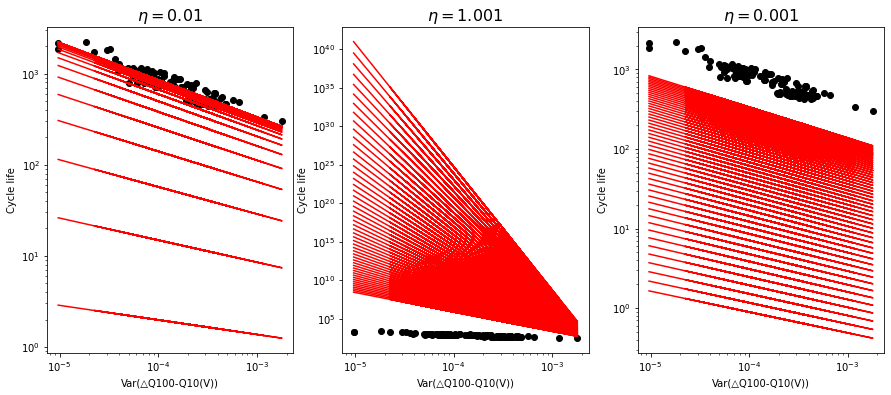

In [220]:
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(15,6))
np.random.seed(42)

X= np.array(X).reshape(-1,1)
scaler = StandardScaler() 
X_scaler = scaler.fit_transform(np.log(X))
X_b = np.c_[np.ones((m,1)), X_scaler]
m= len(X)

Y= np.array(Y).reshape(-1,1)

def make_plot(lr,epochs):
    theta=  np.random.randn(2,1)
    plt.scatter(X,Y,color='black')
    for i in range(epochs):
        gradient = 2/m *X_b.T.dot(X_b.dot(theta)-np.log(Y))
        theta = theta - lr*gradient
        if i % 20 == 0: 
            print('{}:'.format(lr),theta)
            y=X_b.dot(theta)
            plt.plot(X,np.exp(y),c='red')
            plt.xscale('log')
            plt.yscale('log')
            plt.xlabel('Var(△Q100-Q10(V))')
            plt.ylabel('Cycle life')
            plt.title(r"$\eta = {}$".format(lr), fontsize=16)
            
plt.subplot(131); make_plot(lr = 0.01,epochs = 1001)
plt.subplot(132); make_plot(lr = 1.001,epochs = 1001)
plt.subplot(133); make_plot(lr = 0.001,epochs = 1001)
plt.show()

# 표준화를 진행한것은 더욱 일찍수렴하는 모습을 볼 수 있으며, 즉 StandardScaler 를 사용한 아래 예시가 (위 epochs= 10000, 아래 epochs= 1000) 더욱 빠르게 수렴함을 볼 수 있다.

[[ 2.9930046 ]
 [-0.40742467]]


Text(0.5, 1.0, 'Normal Equation')

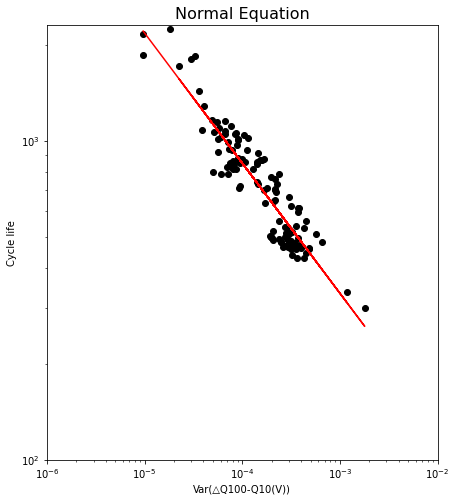

In [222]:
#정규방정식
X= np.array(X).reshape(-1,1)
m= len(X)
X_b = np.c_[np.ones((m,1)), np.log(X)]
Y= np.array(Y).reshape(-1,1)

theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(np.log(Y))
print(theta_best)

y_predict = X_b.dot(theta_best)


plt.figure(figsize=(7,8))
plt.scatter(X,Y,color='black')
plt.plot(X,np.exp(y_predict),c='red')
plt.xscale('log')
plt.yscale('log')
plt.axis([10**(-6),10**(-2),100,2300])
plt.xlabel('Var(△Q100-Q10(V))')
plt.ylabel('Cycle life')
plt.title('Normal Equation',fontsize=16)

[[-0.40742467]] [2.9930046] LinearRegression()


Text(0.5, 1.0, 'SVD_LinearRegression')

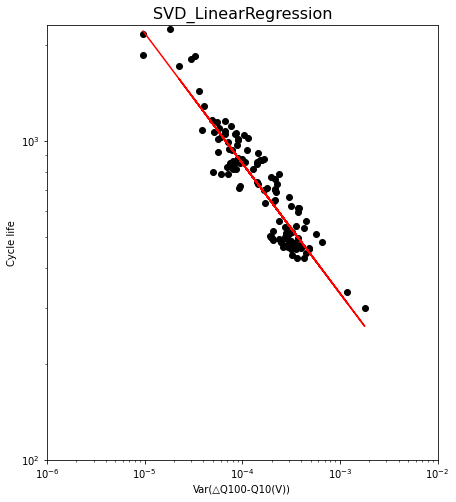

In [223]:
#LinearRegression
from sklearn.linear_model import LinearRegression
line_reg= LinearRegression()
line_reg.fit(np.log(X),np.log(Y))
print(line_reg.coef_ , line_reg.intercept_,line_reg )


y=line_reg.coef_*np.log(X)+line_reg.intercept_


plt.figure(figsize=(7,8))
plt.scatter(X,Y,color='black')
plt.plot(X,np.exp(y),c='red')
plt.xscale('log')
plt.yscale('log')
plt.axis([10**(-6),10**(-2),100,2300])
plt.xlabel('Var(△Q100-Q10(V))')
plt.ylabel('Cycle life')
plt.title('SVD_LinearRegression',fontsize=16)

In [32]:
Y_class=np.array(Y_class).reshape(-1,1)
reg = LinearRegression()
reg.fit(np.log(X),Y_class) # log X 에 대해서 학습함.
print(reg.coef_ , reg.intercept_)
w=reg.coef_
b=reg.intercept_

[[-0.35789466]] [-2.50426077]


Text(0.5, 0, 'Var(△Q100-Q10(V))')

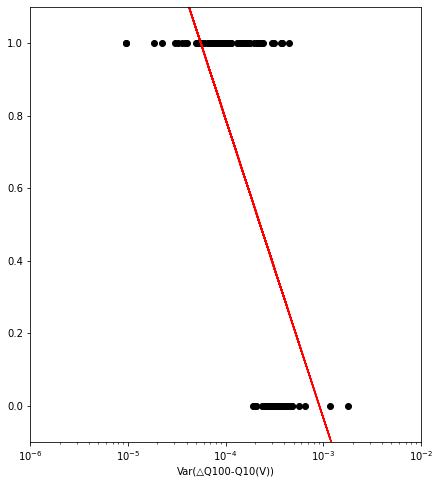

In [48]:
y=w*np.log(X)+b
plt.figure(figsize=(7,8))
plt.scatter(X,Y_class,color='black')
plt.plot(X,y,c='red')
plt.xscale('log')
plt.xlim([10**(-6),10**(-2)])
plt.ylim([-0.1,1.1])
plt.xlabel('Var(△Q100-Q10(V))')

C:\Users\JanggoonKim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Text(0.5, 0, 'Var(△Q100-Q10(V))')

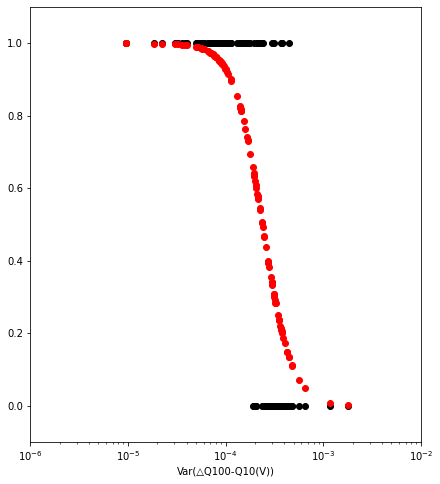

In [87]:
# sigmoid 함수 적용.
from sklearn.linear_model import LogisticRegression
Log_reg = LogisticRegression()
Log_reg.fit(np.log(X),Y_class)
pred_log_y=Log_reg.predict(np.log(X))

decision_=Log_reg.decision_function(np.log(X))
def sigmoid(x):
    return 1 / (1 +np.exp(-x))

plt.figure(figsize=(7,8))
plt.scatter(X,Y_class,color='black')
plt.scatter(X,sigmoid(decision_),color='red')
plt.xscale('log')
plt.xlim([10**(-6),10**(-2)])
plt.ylim([-0.1,1.1])
plt.xlabel('Var(△Q100-Q10(V))')

In [79]:
y1

array([[0.8359504 ],
       [0.8358485 ],
       [0.80209179],
       [0.76075458],
       [0.79015589],
       [0.71899483],
       [0.64602389],
       [0.65438443],
       [0.69867745],
       [0.71363936],
       [0.69636259],
       [0.6914405 ],
       [0.70557649],
       [0.68297546],
       [0.62333038],
       [0.61747453],
       [0.5672456 ],
       [0.56382381],
       [0.69544245],
       [0.67732895],
       [0.69318534],
       [0.65097215],
       [0.66184123],
       [0.66018091],
       [0.65899113],
       [0.6414543 ],
       [0.64769077],
       [0.62263027],
       [0.62660949],
       [0.66090236],
       [0.6467261 ],
       [0.62708055],
       [0.62793532],
       [0.58050713],
       [0.59478099],
       [0.69795333],
       [0.70077777],
       [0.62637774],
       [0.62674859],
       [0.57802709],
       [0.57894987],
       [0.43990059],
       [0.59253963],
       [0.47749725],
       [0.56416162],
       [0.61411874],
       [0.54224534],
       [0.618

# 위 그래프는 선형 관계를 찾을 수 없으며, 
분류를 나타낼 때 linear 모델 사용 정확도 나타내기

In [66]:
# Linear regression - SGDClassifier 비교
Y_=Y_class.ravel()
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
sgd.fit(np.log(X),Y_)
pred_sgd=sgd.predict(np.log(X))

In [67]:
# SGDClassifier 예시 연습하기
print(metrics.accuracy_score(Y_class,pred_sgd))
print(metrics.confusion_matrix(Y_class,pred_sgd))

print(metrics.precision_score(Y_class,pred_sgd))
print(metrics.recall_score(Y_class,pred_sgd))
print(metrics.f1_score(Y_class,pred_sgd))

0.7647058823529411
[[42  0]
 [28 49]]
1.0
0.6363636363636364
0.7777777777777778


In [71]:
decision=sgd.decision_function(np.log(X))

Text(0.5, 0, 'Var(△Q100-Q10(V))')

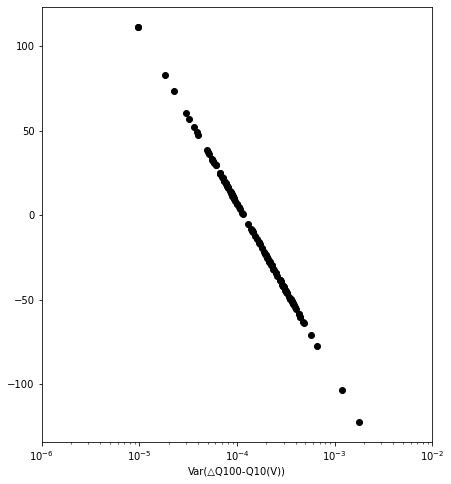

ModuleNotFoundError: No module named 'sklearn.cross_validation'